In [2]:
1

1

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

weather_df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\weather_data.csv")
weather_df

,day,city,weather
0,0,St Louis,sunny
1,0,New York,cloudy
2,0,San Francisco,sunny
3,1,New York,rain
4,1,St Louis,cloudy
5,1,San Francisco,windy
6,2,San Francisco,sunny
7,2,New York,cloudy
8,2,St Louis,cloudy
9,3,New York,sunny


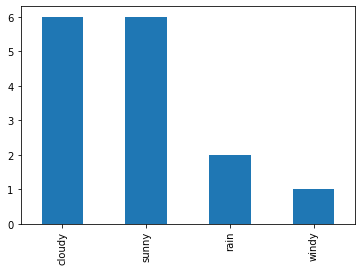

In [4]:
weather_df['weather'].value_counts().plot.bar()
plt.show()

Memvisualisasikan informasi yang sama seperti step sebelumnya

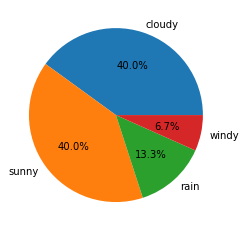

In [5]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.show()

Sekarang kita visualisasikan jumlah jenis cuaca ini. sekalian dengan informasi ttg persentase yang dihitung setiap jenis cuaca. Di sini saya akan menggunakan metode groupby()

In [6]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city')

city,New York,San Francisco,St Louis
weather,,,
cloudy,3.0,NaN,3.0
rain,1.0,NaN,1.0
sunny,1.0,4.0,1.0
windy,NaN,1.0,NaN


Kita lihat, objek ini memuat informasi yang kita butuhkan. Selanjutnya, kita akan memvisualisasi tabel yang kita punya dengan menggunakan <i>stacked bar plot</i>

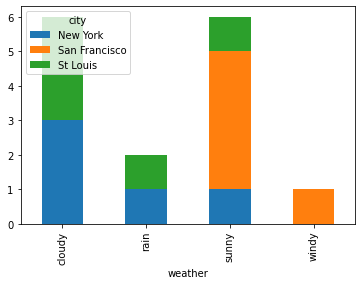

In [7]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city').fillna(0).plot(kind='bar',stacked=True)
plt.show()

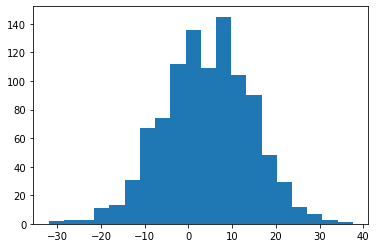

In [8]:
import numpy as np

samples = np.random.normal(4, 10, size=1000)
plt.hist(samples,bins=20)
plt.show()

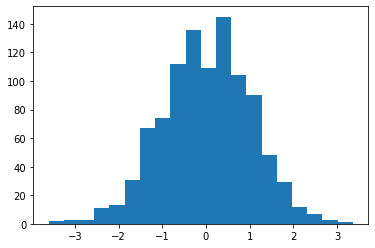

In [9]:
normalized_samples = (samples - 4)/10
plt.hist(normalized_samples,bins=20)
plt.show()

In [10]:
sample_mean = np.mean(samples)
sample_sd = np.std(samples)

In [11]:
print(sample_mean)
print(sample_sd)

4.078475141585839
10.185129865202677


### MIN-MAX SCALING

Dalam dataset ini, 'Kolom 1' isinya 1000 sampel dari distribusi normal dengan mean 4 juga memiliki STD dengan nilai 10. 'Kolom 2' berisi 1000 sampel juga, dengan distribusi seragam dari 1 sampai 2. 'Kolom 3' berisi 1000 sampel dari distibusi beta berparameter 2 dan 5

In [12]:
df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\data.csv")
df

,Column 1,Column 2,Column 3
0,-1.231356,1.305917,0.511994
1,7.874195,1.291636,0.155032
2,13.169984,1.274973,0.183988
3,13.442203,1.549126,0.391825
4,-8.032985,1.895236,0.398122
...,...,...,...
995,-6.698953,1.030317,0.153306
996,14.777217,1.671622,0.204935
997,7.226261,1.098545,0.312753
998,-10.736601,1.116582,0.560168


Gunakan fungsi <b>min_max_scale</b> yang mengambil tiga parameter (data, a, b). Data harus berupa array dalam atribut dataset, sementara a dan be menentukan rentang tmpat data nantinya akan diubah.<br><br>
Di sini kita menggunakan operasi vektorisasi

In [13]:
def min_max_scale(data,a,b):
    data_max = np.max(data)
    data_min = np.min(data)
    return a + (b-a)*(data - data_min)/(data_max - data_min)

Untuk melihat efeknya, kita visualisasi terlebih dahulu

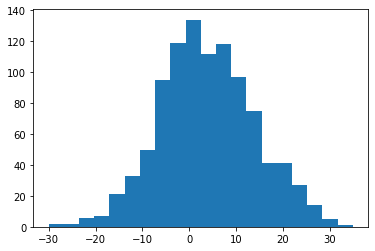

In [14]:
plt.hist(df['Column 1'],bins=20)
plt.show()

Selanjutnya, pakai fungsi <b>plt.hist()</b> untuk memvisualisasi nilai yang sudah direturn dari fungsi minmaxscale untuk menskalakannya ke rentang [-3, 3]

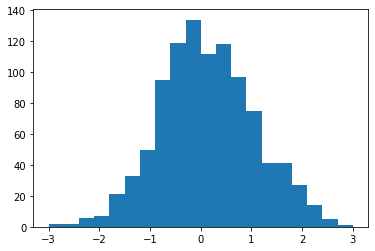

In [15]:
plt.hist(min_max_scale(df['Column 1'],-3,3),bins=20)
plt.show()

Dengan proses yang sama, untuk kolom 2

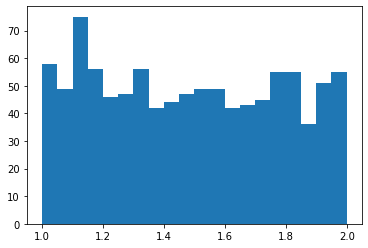

In [16]:
plt.hist(df['Column 2'], bins=20)
plt.show()

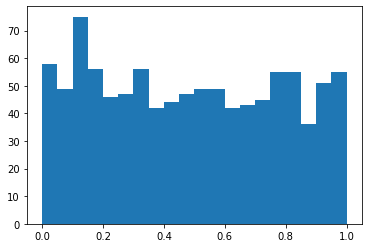

In [17]:
plt.hist(min_max_scale(df['Column 2'], 0, 1), bins=20)
plt.show()

Lagi-lagi untuk kolom 3

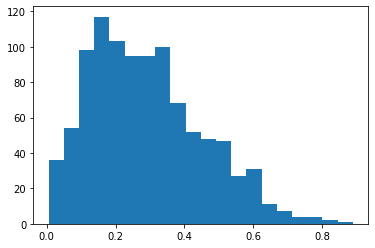

In [18]:
plt.hist(df['Column 3'], bins=20)
plt.show()

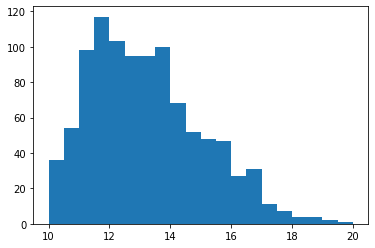

In [19]:
plt.hist(min_max_scale(df['Column 3'], 10, 20), \
                          bins=20)
plt.show()

### Visualizing Probability Density Functions

In [21]:
import numpy as np
import matplotlib.pyplot as plt

samples = np.random.normal(size=1000) # Create 1000 samples from normal D
mean = np.mean(samples)
median = np.median(samples)

q1 = np.percentile(samples,25)
q2 = np.percentile(samples,75)

In [22]:
print(mean)
print(median)
print(q1)
print(q2)

-0.022842465316215855
-0.02138591595804714
-0.7205457354914679
0.6762258811497024


Setelah itu, kita visualisasi menggunakan histogram, masing-masing kuratil buat dengan modelnya tersendiri

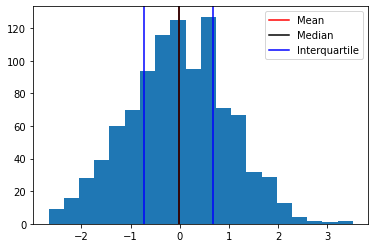

In [23]:
plt.hist(samples,bins=20)
plt.axvline(x=mean,c='red',label='Mean')
plt.axvline(x=median,c='black',label='Median')
plt.axvline(x=q1,c='blue',label='Interquartile')
plt.axvline(x=q2,c='blue')
plt.legend()
plt.show()

Terapkan metode generate data <i>beta</i> yang sama, dengan tambahkan parameter 2 dan 5, setelah itu visualisasi dengan cara yang sama

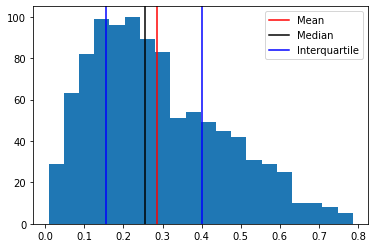

In [25]:
samples = np.random.beta(2, 5, size=1000) # Look at here!
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)

plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

Sekarang, gunakan gamma dengan parameter 5. Visualisasikan dengan cara yang sama

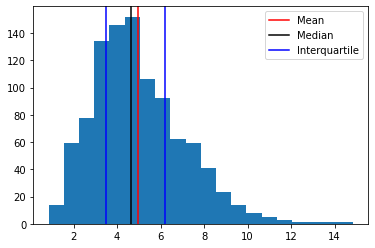

In [26]:
samples = np.random.gamma(5, size=1000) # Look at here!
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)

plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

In [27]:
df = pd.DataFrame({'numerical': np.random.normal(size=5),\
                   'categorical': ['a', 'b', 'a', 'c', 'b'],\
                   'ordinal': [1, 2, 3, 5, 4]})

In [28]:
df

,numerical,categorical,ordinal
0,1.230030,a,1
1,0.803766,b,2
2,0.108314,a,3
3,-0.449696,c,5
4,0.645455,b,4


In [29]:
df.describe()

,numerical,ordinal
count,5.000000,5.000000
mean,0.467574,3.000000
std,0.651241,1.581139
min,-0.449696,1.000000
25%,0.108314,2.000000
50%,0.645455,3.000000
75%,0.803766,4.000000
max,1.230030,5.000000


In [30]:
df.describe(include='all')

,numerical,categorical,ordinal
count,5.000000,5,5.000000
unique,NaN,3,NaN
top,NaN,b,NaN
freq,NaN,2,NaN
mean,0.467574,NaN,3.000000
std,0.651241,NaN,1.581139
min,-0.449696,NaN,1.000000
25%,0.108314,NaN,2.000000
50%,0.645455,NaN,3.000000
75%,0.803766,NaN,4.000000


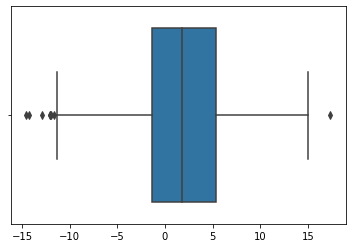

In [31]:
sns.boxplot(np.random.normal(2,5,size=1000))
plt.show()

In [32]:
df = pd.DataFrame({'numerical': np.random.normal(size=1000),\
                   'categorical': np.random.choice\
                                  (['a', 'b', 'c'], size=1000),\
                   'ordinal': np.random.choice\
                              ([1, 2, 3, 4, 5], size=1000)})

In [33]:
df

,numerical,categorical,ordinal
0,-1.363168,a,3
1,-0.362877,c,5
2,0.591277,c,3
3,-1.497560,c,5
4,-0.256221,c,2
...,...,...,...
995,2.345340,b,2
996,1.973313,b,1
997,-0.286826,c,3
998,1.479066,c,1


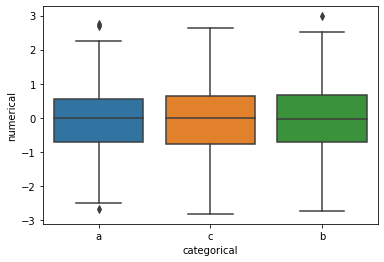

In [34]:
sns.boxplot(y='numerical',x='categorical',data=df)
plt.show()

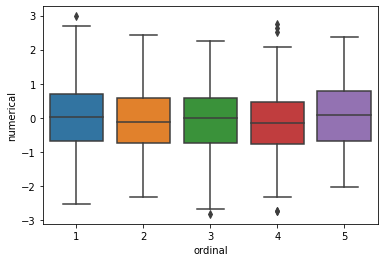

In [35]:
sns.boxplot(y='numerical',x='ordinal',data=df)
plt.show()